In [83]:
# DATASET
# https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
import os
import PIL
import PIL.Image

from pathlib import Path

In [85]:
def load_data():
    X = []
    y = []
    for animal in ["cat", "dog"]:
        for i, file in enumerate(
            [str(x) for x in Path(f"/Users/ryan/data/{animal}").glob("[0-9]*")]
        ):  # /Users/ryan/data for more
            if i == 1000:
                break
            # print(file)
            im = PIL.Image.open(file).resize((64, 64))  # .convert("L").
            arr = np.asarray(im).astype(np.float32)
            # print(arr.shape)
            X.append(arr.tolist())
            if animal == "cat":
                y.append(1)
            else:
                y.append(0)
    return np.asarray(X), np.asarray(y), im


X, y, im = load_data()

# TODO
# /opt/homebrew/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:845: UserWarning: Truncated File Read
#   warnings.warn(str(msg))

In [86]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]


X, y = unison_shuffled_copies(X, y)

In [87]:
from math import inf

N = round(X.shape[0] * 0.7)
M = X.shape[0]
X_train, y_train = X[:N], y[:N]
X_test, y_test = X[N:M], y[N:M]

print(X.shape)
for x in [X_train, y_train, X_test, y_test]:
    print(x.shape)

(2000, 64, 64, 3)
(1400, 64, 64, 3)
(1400,)
(600, 64, 64, 3)
(600,)


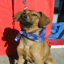

In [88]:
im

In [89]:
m, n = np.asarray(im).shape[:2]
print(m, n)

64 64


In [90]:
def make_model():
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.experimental.preprocessing.Rescaling(
                1.0 / 255, input_shape=(m, n, 3)
            ),
            tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
            tf.keras.layers.experimental.preprocessing.RandomRotation(0.3),
            tf.keras.layers.Conv2D(
                16,
                (3, 3),
                activation="relu",
                kernel_initializer="he_uniform",
                padding="same",
            ),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPool2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(
                32,
                (3, 3),
                activation="relu",
                kernel_initializer="he_uniform",
                padding="same",
            ),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPool2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(
                32,
                (3, 3),
                activation="relu",
                kernel_initializer="he_uniform",
                padding="same",
            ),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPool2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(
                64,
                (3, 3),
                activation="relu",
                kernel_initializer="he_uniform",
                padding="same",
            ),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPool2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(
                256,
                (3, 3),
                activation="relu",
                kernel_initializer="he_uniform",
                padding="same",
            ),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.MaxPool2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(
                128, activation="relu", kernel_initializer="he_uniform"
            ),
            tf.keras.layers.Dropout(0.35),
            # tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(1, activation="sigmoid"),
        ],
        name="cat_model",
    )
    return model

In [91]:
# model = Sequential(
#     [
#         Conv2D(128, (3, 3), activation="relu"),
#         MaxPooling2D((2, 2), strides=2),

#         Conv2D(64, (3, 3), activation="relu"),
#         MaxPooling2D((2, 2), strides=2),

#         Conv2D(32, (3, 3), activation="relu"),
#         MaxPooling2D((2, 2), strides=2),

#         Flatten(),

#         Dense(1024, activation="relu"),
#         Dense(512, activation="relu"),
#         Dense(256, activation="relu"),
#         Dense(64, activation="relu"),
#         Dense(1, activation="sigmoid"),
#     ],
#     name="cat_model",
# )

In [92]:
def compile_fit(_model, _epochs):
    _model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(0.001),
    )
    _model.fit(X_train, y_train, epochs=_epochs)
    return _model

In [111]:
# epoch size
START = 1
END = 52
STEP = 10

In [136]:
EPOCHS = list(range(1, 110, 10))
print(EPOCHS)

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]


In [113]:
models = []
for epoch in EPOCHS:
    models.append(compile_fit(make_model(), epoch))

44/44 [==============================] - 2s 38ms/step - loss: 1.0082
Epoch 1/11
44/44 [==============================] - 2s 38ms/step - loss: 0.9367
Epoch 2/11
44/44 [==============================] - 2s 40ms/step - loss: 0.6928
Epoch 3/11
44/44 [==============================] - 2s 49ms/step - loss: 0.6540
Epoch 4/11
44/44 [==============================] - 2s 43ms/step - loss: 0.6445
Epoch 5/11
44/44 [==============================] - 2s 39ms/step - loss: 0.6447
Epoch 6/11
44/44 [==============================] - 2s 39ms/step - loss: 0.6402
Epoch 7/11
44/44 [==============================] - 2s 40ms/step - loss: 0.6363
Epoch 8/11
44/44 [==============================] - 2s 39ms/step - loss: 0.6050
Epoch 9/11
44/44 [==============================] - 2s 39ms/step - loss: 0.6082
Epoch 10/11
44/44 [==============================] - 2s 40ms/step - loss: 0.6140
Epoch 11/11
44/44 [==============================] - 2s 39ms/step - loss: 0.6058
Epoch 1/21
44/44 [==============================]

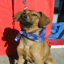

In [96]:
im

In [118]:
def print_model_accuracy(_model):
    ans = _model.predict(X_test)
    yhat = []
    for x in ans:
        if x >= 0.5:
            yhat.append(1)
        else:
            yhat.append(0)
    yhat = np.array(yhat)
    # print(yhat.shape, yhat[:20])
    ans = (np.sum(yhat == y_test) / yhat.shape[0]) * 100
    print(f"{ans}% accuracy")
    return ans

In [120]:
plot_x, plot_y = [], []
for _model, epochs in zip(models, EPOCHS):
    print(f"{epochs} epochs")
    plot_y.append(print_model_accuracy(_model))
    plot_x.append(epochs)

1 epochs
19/19 [==============================] - 0s 12ms/step
48.0% accuracy
11 epochs
19/19 [==============================] - 0s 12ms/step
65.5% accuracy
21 epochs
19/19 [==============================] - 0s 12ms/step
64.66666666666666% accuracy
31 epochs
19/19 [==============================] - 0s 11ms/step
68.83333333333333% accuracy
41 epochs
19/19 [==============================] - 0s 11ms/step
67.33333333333333% accuracy
51 epochs
19/19 [==============================] - 0s 11ms/step
66.33333333333333% accuracy


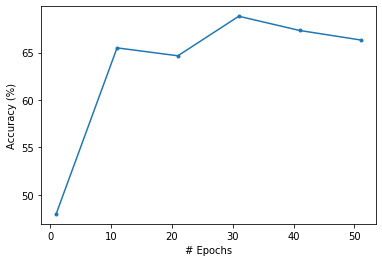

In [134]:
plt.plot(plot_x, plot_y, ".-")
plt.ylabel("Accuracy (%)")
plt.xlabel("# Epochs")
plt.show()